# Nội dung chính:
1. Lý thuyết về mạng Neural
2. Thực hành xây dựng mạng Neural xử lý bài toán XOR bằng thư viện keras
3. Bài tập

# 1. Lý thuyết về mạng Neural

Đã có rất nhiều bài viết xuất sắc về mạng Neural nên trong phần này, tôi chỉ dẫn link lý thuyết đến các bài viết đó. Chúng ta sẽ tập trung vào thực hành để hiểu rõ hơn bản chất về mạng neural.
- Các thuật toán cần biết trước khi vào phần này: Logistic regression, Softmax Regression (có tài liệu thì gọi softmax regression là logistic regression luôn), Perceptron ...
- Lý thuyết cơ bản: (Cấu trúc mạng, lan truyền tiến): 
    * https://nttuan8.com/bai-3-neural-network/
    * https://dominhhai.github.io/vi/2018/04/nn-intro/
- Lan truyền ngược: 
    * https://dominhhai.github.io/vi/2018/04/nn-bp/
    * https://nttuan8.com/bai-4-backpropagation/
- Các hàm active:
    * https://aivietnam.ai/courses/aisummer2019/lessons/ham-activations/
- Thuật toán gradient descent:
    * https://machinelearningcoban.com/2017/01/12/gradientdescent/
    * https://machinelearningcoban.com/2017/01/16/gradientdescent2/
    <br/>
Ngoài ra nếu có thể hãy tìm hiểu thêm thuật toán khác để tối ưu tham số như: momentum, Adagrad, Adadelta, RMSProps, Adam.
- Vấn đề overfiting:
    * https://machinelearningcoban.com/2017/03/04/overfitting/
    * https://dominhhai.github.io/vi/2017/12/ml-overfitting/
    * https://dominhhai.github.io/vi/2018/05/nn-overfitting/
    <br/>
Các bạn <b>cần đọc và hiểu hết các bài viết trên</b> trước khi bắt đầu vào bài viết này.

Sau khi đọc xong lý thuyết, thực hành theo bài sau: https://dominhhai.github.io/vi/2018/04/nn-implement/

Tham khảo thêm (tiếng Anh): http://cs231n.github.io/

# 2. Thực hành xây dựng mạng Neural xử lý bài toán XOR bằng thư viện keras

Keras là một trong số những thư viện giúp ta xây dựng một mạng neural. Chúng ta sẽ cùng xây dựng bằng tay một mạng neural ở phần sau. Và ở các bài viết sau, chúng ta sẽ cùng sử dụng tensorflow để xây dựng mạng neural.

Trong bài viết này, chúng ta sẽ cùng thực hành theo mức độ khó tăng dần, với việc sử dụng thư viện sẵn có, chúng ta không cần hiểu quá sâu về mạng neural vẫn có thể code được, vì các thư viện này đã hỗ trợ hết. Trong mục này, chúng ta xây dựng mạng neural bằng thư viện keras cho bài toán XOR.

Import các module cần thiết.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


Data và nhãn.

In [2]:
x_train = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_train = np.array([[0],
                   [1],
                   [1],
                   [0]])

Thiết lập model:

In [3]:
model = Sequential()
num_neurons = 10
model.add(Dense(num_neurons, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Ở trên, phương thức `summary` trả về thống kê mô hình của ta. <br/>
`Sequential`: khởi tạo đây là 1 mạng neural tuần tự <br/>
`add Dense`: thêm lớp fully connected layer <br/>
`add Activation`: thêm hàm kích hoạt <br/>
Với mô hình trên, mạng chúng ta thiết lập gồm 2 layer: <br/>
* 1 lớp input đầu vào với 2 tham số (Không được tính là 1 layer của mạng) <br/>
* 1 lớp ẩn với 10 tham số, hàm kích hoạt là tanh (dense_1) <br/>
* 1 lớp output với hàm kích hoạt là sigmoid (dense_2) <br/>


Nếu đầu ra mà nhỏ hơn 0.5 ta sẽ trả về 0, lớn hơn 0.5 trả về 1. Đây là bài toán phân lớp nhị phân. <br/>
* Số tham số ở cặp (input, dense_1) là 30 vì đầu input là 2 + bias = 3. Lớp dense_1 có 10 node. --> số tham số là 3*10 = 30 <br/>
* Số tham số ở ở cặp (dense_1, desen_2) là 11 vì desent_1 có 10 node + bias = 11. Dense_2 có 1 node --> số tham số là 11*1 = 11 <br/>

Tiếp theo, chúng ta gọi hàm loss là hàm cross_entropy (tốt cho phân lớp nhị phân), và sử dụng SGD để tối ưu, gọi metric là accuracy để có thể hiển thị kết quả đánh giá mô hình qua từng epoch khi train.

In [4]:
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Nếu chưa train mà dự đoán ta được kết quả sau:

In [5]:
model.predict(x_train)

array([[0.5      ],
       [0.5791017],
       [0.5736111],
       [0.641612 ]], dtype=float32)

Theo kết quả này thì output sẽ sai.<br/>
Ta train mô hình với 200 epochs như sau:

In [6]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 17ms/step - loss: 0.7053 - accuracy: 0.7500
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.7500
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.7500
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.7500
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.7500
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.7500
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.7500
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.7500
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.7500
Epoch 11/200
4/4 [==========

Epoch 84/200
4/4 [==============================] - 0s 747us/step - loss: 0.6578 - accuracy: 0.7500
Epoch 85/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7500
Epoch 86/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.7500
Epoch 87/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7500
Epoch 88/200
4/4 [==============================] - 0s 998us/step - loss: 0.6556 - accuracy: 0.7500
Epoch 89/200
4/4 [==============================] - 0s 754us/step - loss: 0.6550 - accuracy: 0.7500
Epoch 90/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.7500
Epoch 91/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.7500
Epoch 92/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.7500
Epoch 93/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.7500
Epoch 94/200
4

Epoch 166/200
4/4 [==============================] - 0s 997us/step - loss: 0.5975 - accuracy: 0.7500
Epoch 167/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.7500
Epoch 168/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.7500
Epoch 169/200
4/4 [==============================] - 0s 748us/step - loss: 0.5945 - accuracy: 0.7500
Epoch 170/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.7500
Epoch 171/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.7500
Epoch 172/200
4/4 [==============================] - 0s 755us/step - loss: 0.5916 - accuracy: 0.7500
Epoch 173/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.7500
Epoch 174/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.7500
Epoch 175/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.7500
Epoc

Thực hiện dự đoán:

In [7]:
model.predict(x_train)

array([[0.345927  ],
       [0.5620699 ],
       [0.57575417],
       [0.49706164]], dtype=float32)

In [8]:
model.predict_classes(x_train)

array([[0],
       [1],
       [1],
       [0]])

Lưu model:

In [9]:
import h5py
# Xuất cấu trúc của mạng đến một JSON blob để sử dụng sau 
model_structure = model.to_json()
with open("basic_mode.json", "w") as json_file:
    json_file.write(model_structure)
# Các trọng số được đào tạo phải được lưu riêng biệt. 
# Lưu trọng số để load lại chúng chúng sau này.
model.save_weights("basic_weights.h5")

# 3. Bài tập

<b><u>Chú ý:</u></b> Tất cả bài tập dưới đây yêu cầu không sử dụng các thư viện hỗ trợ mạng neural, chỉ được code bằng Python thuần.

<b>Bài 1:</b> Hồi quy Logistic sử dụng mạng neural nhân tạo. (Mạng neuron không có lớp ẩn)<br/>
Yêu cầu: Hoàn thiện code còn thiếu.

Bạn có dataset trong thư mục `./data/cat` của chương này.
- Một tập những ảnh với nhãn là cat (y=1) và non-cat (y=0) dùng để luyện máy học
- Một tập những ảnh với nhãn cat và non-cat dùng để kiểm tra.
- Mỗi ảnh có kích thước (num_px, num-px, 3) với 3 là số kênh của ảnh (RGB). Các ảnh đã được clean cho chiều cao và chiều rộng bằng nhau.

Bạn sẽ xây dựng một thuật toán nhận diện mèo trong ảnh có khả năng phân biệt giữa ảnh có và không có mèo.

In [4]:
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import numpy as np

# sets the backend of matplotlib to the 'inline' backend
%matplotlib inline
def load_dataset():
    train_dataset = h5py.File('./data/cat/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('./data/cat/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Chú ta thêm từ "orig" vào cuối tên của dataset (dữ liệu train và test) vì ta sẽ tiền xử lý dữ liệu. Sau khi tiền xử lý, ta được hai bộ dữ liệu `trainset_x` và `test_set_x`.

Mỗi hàng ở trong `train_set_x_orig` và `test_set_x_orig` là một mảng đại diện cho một ảnh. Bạn có thể hiển thị một ảnh ví dụ bằng cách chạy cell sau. Thay đổi giá trị biến index và chạy lại để cập nhật ảnh.

y = [0], it's a 'non-cat' picture.


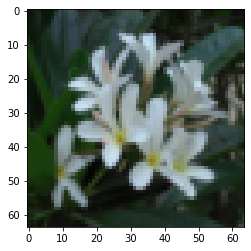

In [5]:
# Example of a picture
index = 28
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + 
       ", it's a '" + 
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

y = [1], it's a 'cat' picture.


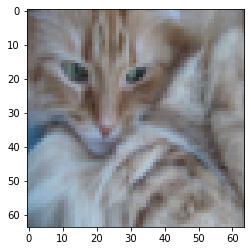

In [8]:
# Example of a picture
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + 
       ", it's a '" + 
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

<b>a.</b> Tìm giá trị cho:
- m_train (số mẫu trong tập train)
- m_test (số mẫu trong tập test)
- num_px (= chiều cao = chiều rộng của ảnh)

Biết rằng train_set_x_orig là một mảng numpy với kích thước (m_train, num_px, num_px, 3).

In [ ]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = None
m_test = None
num_px = None
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

| Trường  | Kết quả |
|---------|---------|
|m_train  |	     209|
|m_test   |	      50|
|num_px   |       64|

<b>b.</b> Biến dạng dữ liệu train và test sao cho mỗi ảnh có kích thước (num_px, num_px, 3) được trải phằng về một vector có kích thước (num_px $\times$ num_px $\times$ 3, 1).

In [ ]:
### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = None
test_set_x_flatten = None
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

| Trường                         |  Kết quả          |
|--------------------------------|-------------------|
| train_set_x_flatten.shape      | (12288, 209)      |
| train_set_y.shape              | (1, 209)          |
| test_set_x_flatten.shape       | (12288, 50)       |
| test_set_y.shape               | (1, 50)           |
| sanity check after reshaping   | [17 31 56 22 33]  |

Để biểu diễn ảnh màu trong máy tính, 3 kênh màu đỏ, xanh lục và xanh lá cây (RGB) được sử đụng cho mỗi pixel, và mỗi pixel có giá trị là một vector gồm có 3 phần tử tương ứng, mỗi phần tử có giá trị trong khoảng từ 0 đến 255.

Một ví dụ thông thường trong máy học là chuẩn hóa dữ liệu, ví dụ như lấy giá trị dữ liệu trừ đi kì vọng của dataset, sau đó chia kết quả cho độ lệch chuẩn của dataset, còn gọi là Z-score.

Nhưng với dữ liệu ảnh này, một cách đơn giản và tiện hơn nhưng cũng khá hiệu quả là chia giá trị mỗi pixel cho 255 (giá trị cực đại của mỗi kênh của một pixel).

Sau đây là bước chuẩn hóa dữ liệu.

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

Bạn sẽ xây dựng một thuật toán hồi quy Logistic sử dụng mạng neuron. Hồi quy Logistic thực ra là một mạng neuron đơn giản!<br/>
<img src="./images/logistic.png"/>

<b>Nhắc lại:</b> Biểu thức toán học của thuật toán:<br/>
Với mỗi mẫu $x^{(i)}$<br/>
$$z^{(i)}=w^T.x^{(i)}+b$$
$$y_{predict}^{(i)}=a^{(i)}=sigmoid(z^{(i)})$$
$$L(a^{(i)},y^{(i)})=-y^{(i)}log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

Note: Hàm chi phí được tính bằng trung bình chi phí của tất cả các mẫu

Các bước chính để xây dựng một mạng Neuron:

1. Xác định kiến trúc của mô hình (số đặc trưng đầu vào, số kết quả đầu ra, số lớp trong mạng, cấu trúc của mỗi lớp, số lượng tham số, etc)
2. Khởi tạo giá trị ban đầu cho các tham số cho mô hình
3. Vòng lặp:
    - Tính hàm loss (hay cost) (lan truyền thẳng)
    - Tính gradient dựa trên giá trị hàm loss (lan truyền ngược)
    - Cập nhật giá trị cho các tham số dựa trên gradient tính được (phương pháp hướng giảm gradient)
    
Bạn thường sẽ xây dựng các bước độc lập sau đó tích hợp vào chung một hàm gọi là model().

<b>c.</b> Triển khai hàm `sigmoid()`.

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = None
    ### END CODE HERE ###
    
    return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

Kết quả mong đợi: `sigmoid([0, 2]) = [ 0.5, 0.88079708]`

<b>d.</b> Khởi tạo các tham số. <br/>
Hãy khởi tạo bộ tham số w là vector với toàn giá trị 0. Nên sử dụng hàm `numpy.zeros()`. <br/>
Với kích thước ảnh đầu vào, w sẽ có kích thước (num_px $\times$ num_px $\times$ 3, 1).

In [ ]:

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = None
    b = None
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

| Tham số | Đầu ra      |
|---------|-------------|
| w       |[[ 0.],[ 0.]]|
| b       | 0           |

<b>e.</b> Lan truyền tiến và lan truyền ngược:

Bây giờ các tham số đã được khởi tạo, bạn có thể lan thuyền thẳng và ngược để cập nhật các tham số.

Bài tập: triển khai hàm `propagate()` tính hàm chi phí và gradient của nó.

In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = None                                    # compute activation
    cost = None                                 # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = None
    db = None
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

| Tham số | Đầu ra                      |
|---------|-----------------------------|
|dw       |[[ 0.99845601] [ 2.39507239]]|
|db       |0.00145557813678             |
|cost     |5.801545319394553            |

<b>f.</b> Tối ưu: sử dụng Gradient descent

In [ ]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = None
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = None
        b = None
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

| Tham số | Đầu ra                       |
|---------|------------------------------|
|w        |[[ 0.19033591] [ 0.12259159]] |
|b        |1.92535983008                 |
|dw       |[[ 0.67752042] [ 1.41625495]] |
|db       |0.219194504541                |

<b>g.</b> Dự đoán kết quả:

In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = None
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        pass
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

Đầu ra mong muốn: predictions = [[ 1. 1. 0.]]

<b>h.</b> Thực thi hàm `model` sử dụng các định danh sau:
- `Y_prediction_test` dành cho dự đoán trên tập dữ liệu test.
- `Y_prediction_train` dành cho dự đoán trên tập dữ liệu train.
-  w, costs, grads là các đầu ra của hàm optimize()

In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = None

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = None
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = None
    Y_prediction_train = None

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Chạy cell để luyện mô hình:

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

| Tham số               | Đầu ra            |
|-----------------------|-------------------|
|Cost after iteration 0 | 0.693147          |
| Train Accuracy        |99.04306220095694% |
| Test Accuracy         |70.0%              |

<b>Bình luận:</b> Độ chính xác của tập luyện đã gần 100%. Đây là một cách kiểm tra tốt: Mô hình của bạn hoạt động và có khả năng khớp với dữ liệu luyện. độ chính xác trên tập test là 68%. Đây không phải là kết quả tệ cho một mô hình đơn giản, với số lượng mẫu mà chúng ta sử dụng cũng như mô hình hồi quy logistic là một phân lớp tuyến tính. Đừng lo lắng, bạn sẽ xây dựng được những phân lớp tốt hơn trong những bài tiếp theo!

Bạn cũng có thể thấy mô hình này đã overfit trên dữ liệu luyện. Sử dụng code phía dưới (và thay đổi giá trị biến index) bạn có thể thấy dự đoán của những bức ảnh trong tập test.

In [ ]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

Biểu diễn hàm chi phí và gradients.

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

<b>Nhận xét:</b> Bạn có thể thấy hàm chi phí giảm. Điều này chỉ ra rằng các tham số đã được học. Tuy nhiên bạn càng tăng số vòng lặp lên, độ chính xác trên dữ liệu luyện càng tăng nhưng độ chính xác trên dữ liệu test giảm xuống. Đây được gọi là overfitting.

<b>i.</b> Chạy ô bên dưới để thử nghiệm các learning rate khác nhau. Phân tích và đánh giá kết quả.

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<b>j.</b> Kiểm tra với ảnh mèo của chính bạn. Chỉnh lại các đường dẫn đến 1 ảnh mèo của bạn và thử chạy code sau để xem dự đoán đúng không.

In [ ]:

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<b>Bài 2:</b> Phân lớp dữ liệu trên mặt phẳng với mạng neuron có lớp ẩn.

Sử dụng mạng neuron để giải quyết bài toán phân lớp dữ liệu có dạng như dưới đây. Yêu cầu code chay, không sử dụng thư viện.

In [14]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

X, Y = load_planar_dataset()
Y = Y.ravel()

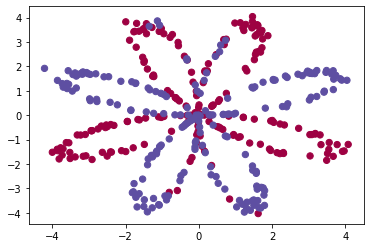

In [16]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

<b>Bài 3:</b> Xử lý phân <i>các</i> lớp bộ dữ liệu dưới đây bằng mạng neuron (code chay).

In [27]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

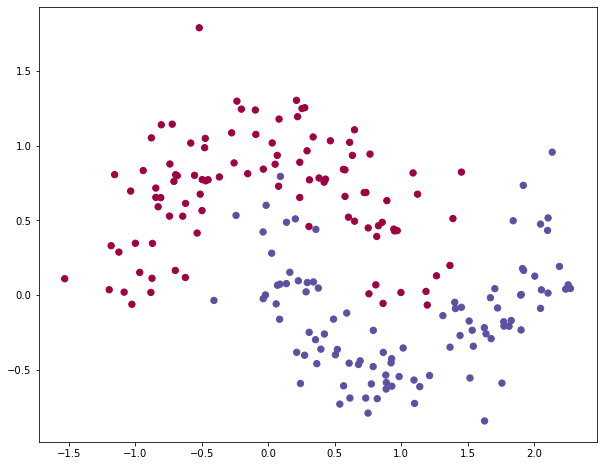

In [36]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)